# **Imports and dataframe**

In [1]:
import pandas as pd
import numpy as np
#Graphics
import matplotlib.pyplot as plt
import seaborn as sns
#Model
from sklearn.neighbors import NearestNeighbors
#Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Data selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
#Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,NaN,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,NaN,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,NaN,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.isna().sum()

id               0
date             0
price            4
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df[df['price'].isna()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21609,6600060120,20150223T000000,NaN,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,NaN,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,NaN,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,NaN,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [8]:
df.shape


(21613, 21)

In [9]:
df.dropna(inplace = True)

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160900e+04,2.160900e+04,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,4.580689e+09,5.401174e+05,3.370957,2.114848,2080.009394,1.510927e+04,1.494215,0.007543,0.234347,3.409505,7.656902,1788.446388,291.563006,1970.998149,84.417881,98077.932898,47.560053,-122.213888,1986.675876,12770.270767
std,2.876501e+09,3.671546e+05,0.930041,0.770114,918.462157,4.142399e+04,0.539995,0.086525,0.766382,0.650779,1.175546,828.126031,442.598231,29.371599,401.714775,53.503078,0.138576,0.140832,685.379601,27306.360213
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470900,-122.328000,1490.000000,5100.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10084.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
df[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view']]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0


In [12]:
df[['condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...
21604,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265


<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

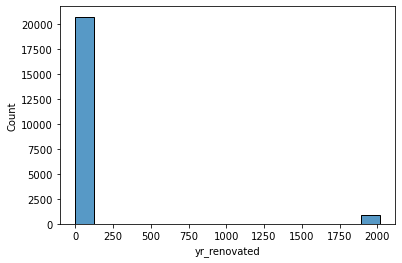

In [13]:
df['yr_renovated'].value_counts()
sns.histplot(df['yr_renovated'])

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

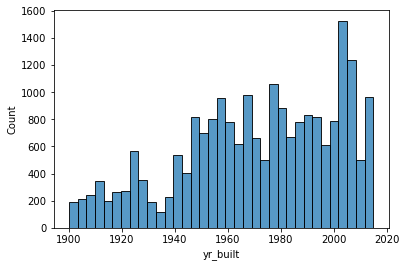

In [14]:
sns.histplot(df['yr_built'])

<AxesSubplot:xlabel='zipcode', ylabel='Count'>

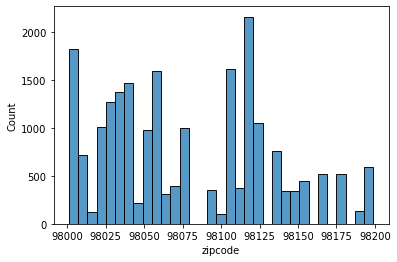

In [15]:
sns.histplot(df['zipcode'])

In [16]:
print(df['price'].quantile(q = np.arange(0, 1.1, 0.1)))
print('Minimum price:' ,df['price'].quantile(q = 0))                           
print('Maximum price:' ,df['price'].quantile(q = 1))

0.0      75000.0
0.1     245000.0
0.2     298270.0
0.3     345000.0
0.4     399500.0
0.5     450000.0
0.6     519000.0
0.7     595000.0
0.8     700308.0
0.9     887040.0
1.0    7700000.0
Name: price, dtype: float64
Minimum price: 75000.0
Maximum price: 7700000.0


<AxesSubplot:xlabel='price'>

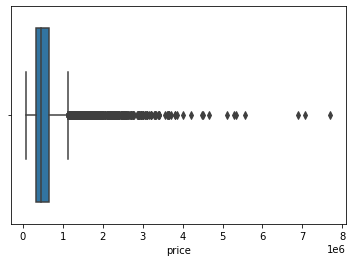

In [17]:
sns.boxplot(x=df['price'])

<AxesSubplot:>

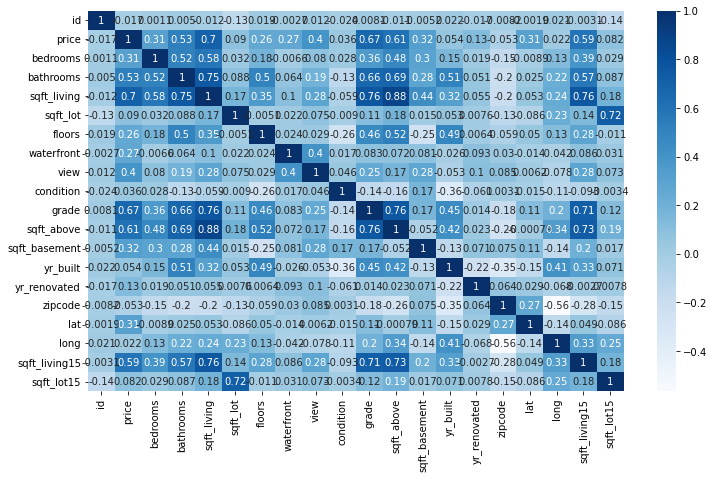

In [18]:
plt.figure(figsize = (12, 7))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)

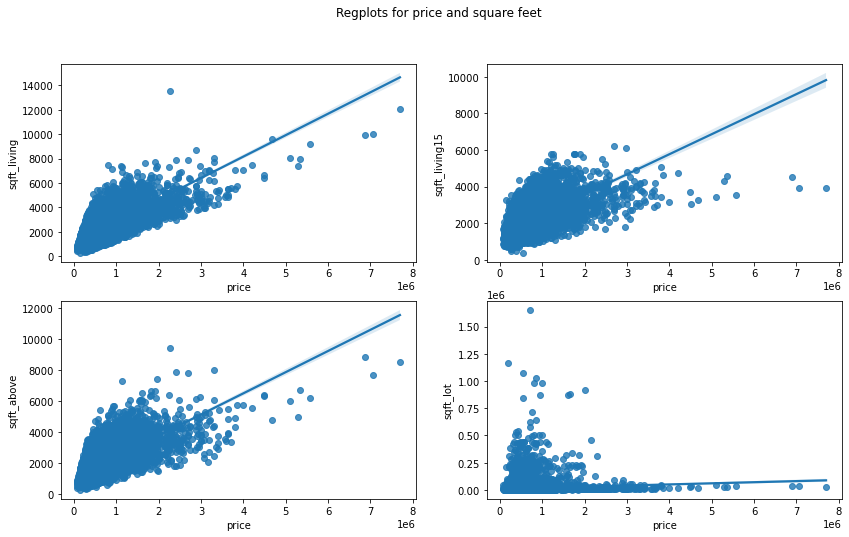

In [19]:
fig, ax = plt.subplots(figsize = (14,8), nrows = 2, ncols = 2)
plt.suptitle('Regplots for price and square feet')
sns.regplot(ax = ax[0,0], data = df, x = 'price', y = 'sqft_living') 
sns.regplot(ax = ax[0,1], data = df, x = 'price', y = 'sqft_living15') 
sns.regplot(ax = ax[1,0], data = df, x = 'price', y = 'sqft_above')
sns.regplot(ax = ax[1,1], data = df, x = 'price', y = 'sqft_lot')
plt.show()

In [20]:
df_model = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','zipcode']]


In [21]:
df_model.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
count,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,3.370957,2.114848,2080.009394,1.510927e+04,1.494215,0.007543,0.234347,3.409505,7.656902,1788.446388,291.563006,1970.998149,98077.932898
std,0.930041,0.770114,918.462157,4.142399e+04,0.539995,0.086525,0.766382,0.650779,1.175546,828.126031,442.598231,29.371599,53.503078
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000
50%,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000
75%,4.000000,2.500000,2550.000000,1.068900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000


In [22]:
X = df_model[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','yr_built','zipcode']]

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)


In [23]:
model = NearestNeighbors(n_neighbors=5)
model.fit(X_scaled)

NearestNeighbors()

In [24]:
my_test = [[3.37,2.11,2080,15109,1.49,1,1,3.4,7.65,1970,98077]]

my_test

result = model.kneighbors(my_test, 5, return_distance = False)


In [25]:
print(df_model['bedrooms'].mean())
print(df_model['bathrooms'].mean())
print(df_model['sqft_living'].mean())
print(df_model['sqft_lot'].mean())
print(df_model['floors'].mean())
print(df_model['condition'].mean())
print(df_model['grade'].mean())
print(df_model['sqft_above'].mean())
print(df_model['sqft_basement'].mean())
print(df_model['yr_built'].mean())
print(df_model['zipcode'].mean())

3.3709565458836597
2.1148479800083297
2080.009394233884
15109.272201397565
1.4942153732241197
3.409505298718127
7.65690221666898
1788.446388079041
291.56300615484287
1970.9981489194317
98077.9328983294


In [26]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode'],
      dtype='object')

In [27]:
for i in range(5):
    print(df['price'].iloc[result[0][i]])

700000.0
998000.0
855000.0
1998000.0
190000.0


In [44]:
def ask_input():
    specs = []
    specs.append(input('Please insert the number of bedrooms : '))
    specs.append(input('Please insert the number of bathrooms: '))
    specs.append(input('Please insert the square feet of the interior of the house: '))
    specs.append(input('Please insert the square feet of the land space: '))
    specs.append(input('Please insert the number of floors: '))
    specs.append(input('Is your home overlooking the waterfront? Please insert 0 for no, and 1 for yes: '))
    specs.append(input('How good is the view of the property? Please insert a number between 0(bad) and 4(great): '))
    specs.append(input('What is the current condition of the property? Please insert a number between 0(horrible) and 5(excellent): '))
    specs.append(input('What is the grade of the property regarding construction and design? Please insert a number between 1(horrible) and 13(highest level): '))
    specs.append(input('In what year was the house initially build?'))
    specs.append(input('What is your zipcode? '))
    model_entry = [specs]
    result = model.kneighbors(model_entry, 5, return_distance = False)
    print("Please find below 5 prices of house similar to your")
    for i in range(5):
        print("Price for a house close to your is ",df['price'].iloc[result[0][i]])
    return model_entry



In [46]:
ask_input()

Please insert the number of bedrooms : 2
Please insert the number of bathrooms: 1
Please insert the square feet of the interior of the house: 90
Please insert the square feet of the land space: 0
Please insert the number of floors: 2
Is your home overlooking the waterfront? Please insert 0 for no, and 1 for yes: 0
How good is the view of the property? Please insert a number between 0(bad) and 4(great): 4
What is the current condition of the property? Please insert a number between 0(horrible) and 5(excellent): 4
What is the grade of the property regarding construction and design? Please insert a number between 1(horrible) and 13(highest level): 2
In what year was the house initially build?1950
What is your zipcode? 98200
Please find below 5 prices of house similar to your
Price for a house close to your is  1107460.0
Price for a house close to your is  1054690.0
Price for a house close to your is  1035290.0
Price for a house close to your is  671000.0
Price for a house close to your is

/Users/cedricpinel/opt/anaconda3/envs/Wild_code/lib/python3.8/site-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


[['2', '1', '90', '0', '2', '0', '4', '4', '2', '1950', '98200']]

3.3709565458836597
2.1148479800083297
2080.009394233884
15109.272201397565
1.4942153732241197
3.409505298718127
7.65690221666898
1788.446388079041
291.56300615484287
1970.9981489194317
98077.9328983294